<a href="https://colab.research.google.com/github/Fatemah-Husain/Exploratory-Data-Analysis/blob/main/Blog_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Tools and Techniques for Exploratory Data Analysis**


By Fatemah Husain (f.husain@ku.edu.kw) - More details can be found at https://infoscilab.ku.edu.kw/blog-page/ 

Please cite the following studies if you are using the code for publications or academic purposes: 



* Husain, F., & Uzuner, O. (2021). Exploratory Arabic Offensive Language Dataset Analysis. arXiv preprint arXiv:2101.11434.

* Husain, F. (2021). Arabic Offensive Language Detection in Social Media (Doctoral dissertation, George Mason University).



---





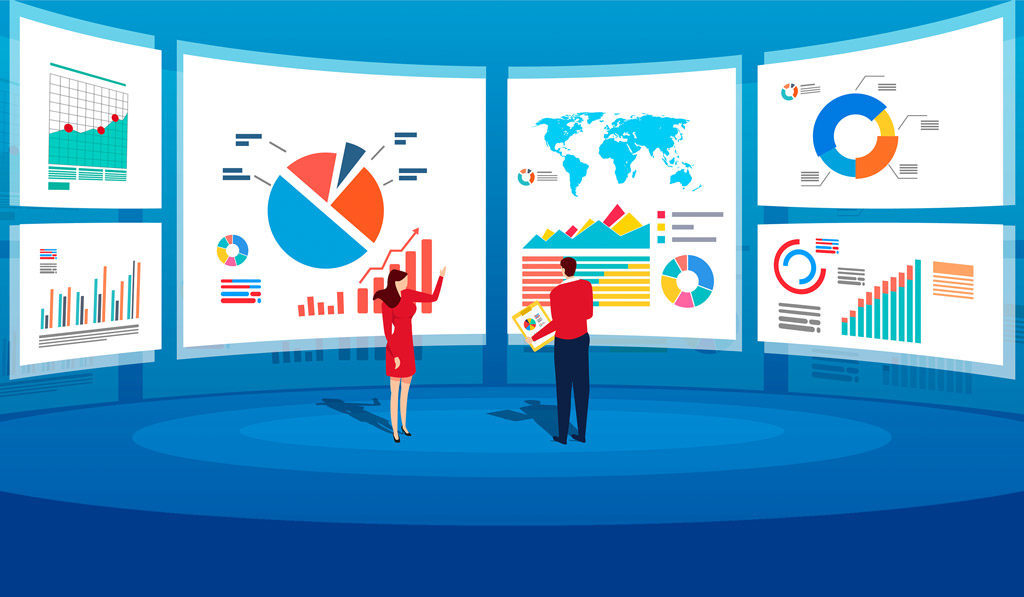

Before selecting and working with data, it is always better to get to know it and understand its content. An initial investigation of the dataset is very crucial to conduct before using the dataset in research or further analysis. It can help to detect trends and patterns in data, identify outliers, and find valuable relations among variables. This investigation is called Exploratory Data Analysis (EDA). The EDA applies statistical methods and data visualization tools to support the exploration process. The main goals of the EDA are to deeply understand the content and structure of the data, and to find out if there are any problems in the data.

**Knowing Your Data**

In this article, the type of the data explored is mostly textual data. I will present an overview for  some EDA tools for the Arabic language using Python; such as the number of characters per token and the number of tokens per post, and word cloud graph. Conducting an in-depth investigation support understanding the content of the dataset from multiple dimensions. Some visualization tools are used to better understand the content and context of the data. This article covers the following steps:

Step 1: importing libraries

Step 2: reading the dataset

Step 3: basic filtering and cleaning

Step 4: tokens frequencies

Step 5: stop words frequencies

Step 6: number of tokens per tweet

Step 7: number of characters per token

Step 8: word cloud graph 




**Dataset**

For the purpose of this exercise, I extracted a set of Arabic tweets that contain the Arabic word “مجبوس / Machboos”. Machboos is a traditional Kuwaiti dish. You can check [this video](https://www.youtube.com/watch?v=dsu7LAOJX-E) if you are curious to know more about it. While I am writing this article, I was thinking about what to cook for tomorrow lunch. I decided to prepare the ingredient for chicken Machboos, and so I used it to extract the dataset and explore how people are using it on Twitter. The dataset can be [downloaded from here.](https://github.com/Fatemah-Husain/Exploratory-Data-Analysis)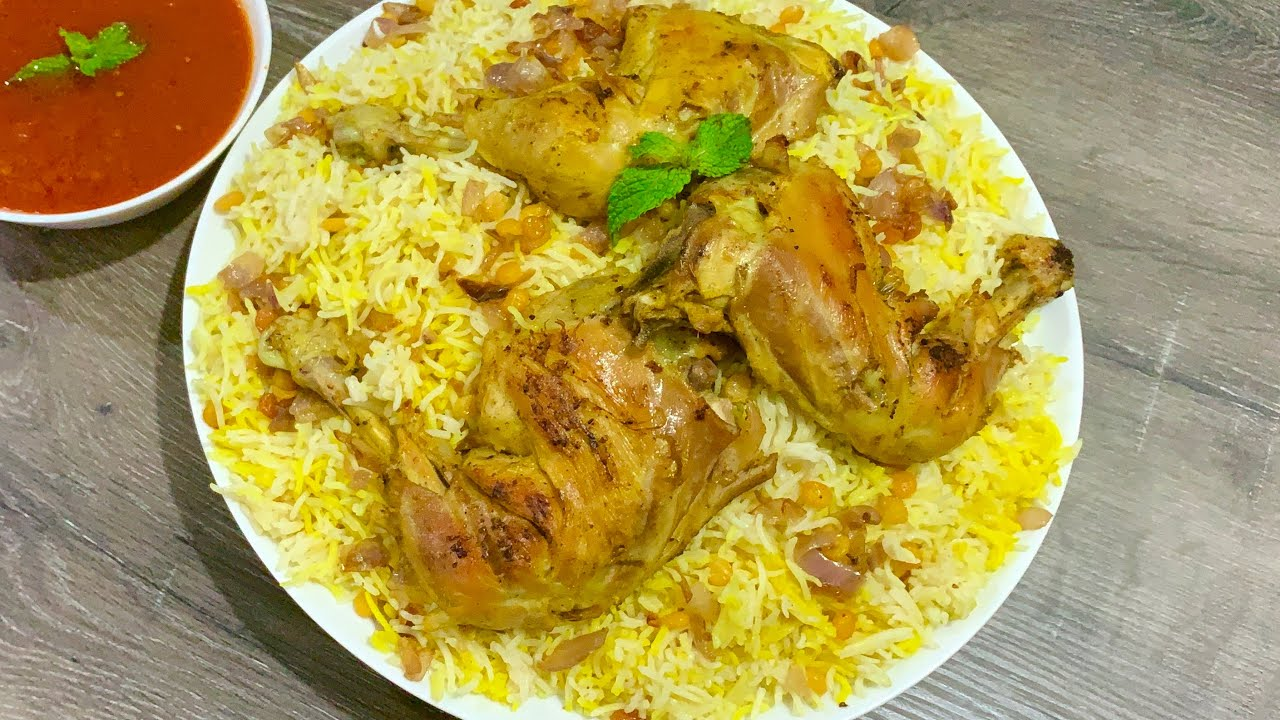

#**Basic EDA Techniques Examples For Arabic text in Python​**

# **Step 1: Importing  Libraries​**

In [1]:
import pandas as pd
import numpy as np
import csv
import string 
import re
import itertools
import collections
import codecs
import requests
import nltk
nltk.download('punkt')
from nltk import word_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# **Step 2: Reading the Dataset​**

First I uploaded the dataset to the Colab project, then I fetch the file as the following:

In [2]:
Dataset = pd.read_csv('/content/Machboos.csv', sep=',', encoding='utf-8-sig')
Dataset

,Text,User_ScreenName,User_Profile,Users_URL,Follower_Count,Frinds_Count,ScreenName,Geo,Source,Location,Created_at,Contributors,Entities,Retweet_Count,Polarity,Subjectivity
0,@hamadtion مجبوس دياي😋,BntaLFares,﮼وإني،ياربّ،قد،وليتُگ،گل،ما،في،قلبّي ..🕊 ﮼فقير...,NaN,93,295,﮼‏ ﮼بنت،الفارس,NaN,Twitter for iPhone,دولة الكويت,2022-05-27 23:58:24,1530337657359843328,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,0.0,0.0
1,ابا مجبوس سبايسي ويا دقوس وروب و رويد,meemrreem,@nottyourhouse,NaN,47,49,🦋,NaN,Twitter for iPhone,NaN,2022-05-27 23:15:10,1530326775577948161,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,0.0,0.0
2,@JENNIEOFMEY @gorgeous4ew مجبوس دياي,batoolakmail,❋ PALESTINIAN 🇵🇸 ┆♀️ #انا_عقبة | #بلاد_الشام_ا...,https://t.co/OLD3zR2Gbp,605,335,𓂆 batool,NaN,Twitter for iPhone,أرض كنعان,2022-05-27 23:04:10,1530324008725528577,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,0.0,0.0
3,RT @ahmadbalali: واحد يبيع مجبوس دياي وكيك باض...,maqseed2,got,NaN,115,251,maqseed,NaN,Twitter for iPhone,NaN,2022-05-27 22:19:58,1530312885754384389,"{'hashtags': [], 'symbols': [], 'user_mentions...",7,0.0,0.0
4,@Zezo_rmd سبيس لو محوليه لتعليم كيف عمل مجبوس ...,J_Rmd_,اللهم عافنا واعف عنا,NaN,202,99,الدون جهاد..حساب بديل,NaN,Twitter Web App,NaN,2022-05-27 22:15:43,1530311817146290176,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,العيش والملح الي بينا قول حق خالتك تسويه مجبوس✴️,abuor333,NaN,NaN,119,347,Abuomar,NaN,Twitter for iPhone,"الرياض, المملكة العربية السعود",2022-05-20 05:38:34,1527524161429590016,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,0.0,0.0
770,@sa_aja1 @AHMED99828464 لا تخليني اقردنك ب مجب...,2DWAS,#DWAS,NaN,1165,357,DWAS,NaN,Twitter for Android,طويق,2022-05-20 05:14:18,1527518055282184196,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,0.0,0.0
771,@AmooreeMind ما قررت تبين الصج بس شكلي بسوي مج...,s_alwali,إن صار ساسك من بني كندة علا الشّان الرّفيع .. ...,NaN,6653,1024,الــ شيخه ــوالي,NaN,Twitter for iPhone,🇦🇪,2022-05-20 03:55:28,1527498215712505875,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,0.0,0.0
772,@ZaidBenjamin5 ليش ما تقلب على الطباخ و مجبوس ...,MahirSaad1,#BTC #crypto #ETH #SHIB #Astrology\nNot a Fine...,NaN,324,335,ماهر الاختام,NaN,Twitter for Android,كوكب القرود,2022-05-20 02:55:43,1527483175743660040,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,0.0,0.0



Since the exploration focuses only on the tweets,  I will extract the tweets and save them into an array to be used on the following steps. 

In [3]:
tweets = Dataset.loc[:,"Text"]
tweets

0                                 @hamadtion مجبوس دياي😋
1                  ابا مجبوس سبايسي ويا دقوس وروب و رويد
2                   @JENNIEOFMEY @gorgeous4ew مجبوس دياي
3      RT @ahmadbalali: واحد يبيع مجبوس دياي وكيك باض...
4      @Zezo_rmd سبيس لو محوليه لتعليم كيف عمل مجبوس ...
                             ...                        
769     العيش والملح الي بينا قول حق خالتك تسويه مجبوس✴️
770    @sa_aja1 @AHMED99828464 لا تخليني اقردنك ب مجب...
771    @AmooreeMind ما قررت تبين الصج بس شكلي بسوي مج...
772    @ZaidBenjamin5 ليش ما تقلب على الطباخ و مجبوس ...
773                                   ابي مجبوس دياي!! 🙂
Name: Text, Length: 774, dtype: object

The total number of tweets is 774 tweets before cleaning and filtering.

# **Step 3: Basic Filtering and Cleaning​**

The main goal of this step is to remove any unnecessary content that might affect the results of the analysis or that might cause some violation to user's privacy. For example, it is recommended to remove usernames from the data to preserve their privacy.


In this script, I first replace username's mentions with the string/keyword "@USER" to anonymize the data:

In [4]:
# Define an array for the filtered tweets list

filteredTweets = []

for tweet in tweets:
  tweet = str(tweet)
  # Replace the specific part of the string based on pattern
  replacedText = re.sub('@[a-zA-Z0-9_.-]*', '@USER', tweet)
  # uncomment the next line if you want to totally remove usermentions
  #replacedText = re.sub('@USER:', '', replacedText)
  # Print the original tweet
  print("Original Text:", tweet)
  # Print the replaced tweet
  print("\nReplaced Text:", replacedText)
  # Adding the replaced tweet to the filtered tweet list
  filteredTweets.append(replacedText)


Original Text: @hamadtion مجبوس دياي😋

Replaced Text: @USER مجبوس دياي😋
Original Text: ابا مجبوس سبايسي ويا دقوس وروب و رويد

Replaced Text: ابا مجبوس سبايسي ويا دقوس وروب و رويد
Original Text: @JENNIEOFMEY @gorgeous4ew مجبوس دياي

Replaced Text: @USER @USER مجبوس دياي
Original Text: RT @ahmadbalali: واحد يبيع مجبوس دياي وكيك باضعاف سعره زعلان ان راتب الدكتور ٥ الاف .. طبعا بعد ١٠ سنوات خدمة والدكتوراة وبعد ما تطلع عينه…

Replaced Text: RT @USER: واحد يبيع مجبوس دياي وكيك باضعاف سعره زعلان ان راتب الدكتور ٥ الاف .. طبعا بعد ١٠ سنوات خدمة والدكتوراة وبعد ما تطلع عينه…
Original Text: @Zezo_rmd سبيس لو محوليه لتعليم كيف عمل مجبوس الدياي احسن

Replaced Text: @USER سبيس لو محوليه لتعليم كيف عمل مجبوس الدياي احسن
Original Text: شاركو عن مجبوس https://t.co/cvnqlywaiZ

Replaced Text: شاركو عن مجبوس https://t.co/cvnqlywaiZ
Original Text: ماحدن تجمل علينا
اللي سوّا لنا مجبوس كنا نقطع له بصل🏃‍♀️

Replaced Text: ماحدن تجمل علينا
اللي سوّا لنا مجبوس كنا نقطع له بصل🏃‍♀️
Original Text: @fhd_007 أنا ع

Duplicated tweets might affect the results, so I first remove the retweets keyword "RT" and then remove duplicates. 

In [5]:
# removing RT
# Define an array for the tweets without RT character list
filteredCleanedTweet = []

for tweet in filteredTweets:
  tweet = str(tweet)
  # Replace the specific part of the string based on pattern
  replacedText = re.sub('RT', '', tweet)
  # Print the original tweet
  print("Original Text:", tweet)
  # Print the replaced tweet
  print("\nReplaced Text:", replacedText)
  # Adding the replaced tweet to the filtered tweet list
  filteredCleanedTweet.append(replacedText)

Original Text: @USER مجبوس دياي😋

Replaced Text: @USER مجبوس دياي😋
Original Text: ابا مجبوس سبايسي ويا دقوس وروب و رويد

Replaced Text: ابا مجبوس سبايسي ويا دقوس وروب و رويد
Original Text: @USER @USER مجبوس دياي

Replaced Text: @USER @USER مجبوس دياي
Original Text: RT @USER: واحد يبيع مجبوس دياي وكيك باضعاف سعره زعلان ان راتب الدكتور ٥ الاف .. طبعا بعد ١٠ سنوات خدمة والدكتوراة وبعد ما تطلع عينه…

Replaced Text:  @USER: واحد يبيع مجبوس دياي وكيك باضعاف سعره زعلان ان راتب الدكتور ٥ الاف .. طبعا بعد ١٠ سنوات خدمة والدكتوراة وبعد ما تطلع عينه…
Original Text: @USER سبيس لو محوليه لتعليم كيف عمل مجبوس الدياي احسن

Replaced Text: @USER سبيس لو محوليه لتعليم كيف عمل مجبوس الدياي احسن
Original Text: شاركو عن مجبوس https://t.co/cvnqlywaiZ

Replaced Text: شاركو عن مجبوس https://t.co/cvnqlywaiZ
Original Text: ماحدن تجمل علينا
اللي سوّا لنا مجبوس كنا نقطع له بصل🏃‍♀️

Replaced Text: ماحدن تجمل علينا
اللي سوّا لنا مجبوس كنا نقطع له بصل🏃‍♀️
Original Text: @USER أنا عن جد أعرف تأثير مجبوس اللحم اللذيذ 

The newline character "\n"  needs to be removed too, before removing duplicates. 

In [6]:
# removing the newline character "\n"


filteredCleanedLineTweet = []

for tweet in filteredCleanedTweet:
  tweet = str(tweet)
  # Remove new line character
  replacedText = re.sub('\n', ' ', tweet)
  # Adding the replaced tweet to the filtered tweet list
  filteredCleanedLineTweet.append(replacedText)

filteredCleanedLineTweet

['@USER مجبوس دياي😋',
 'ابا مجبوس سبايسي ويا دقوس وروب و رويد',
 '@USER @USER مجبوس دياي',
 ' @USER: واحد يبيع مجبوس دياي وكيك باضعاف سعره زعلان ان راتب الدكتور ٥ الاف .. طبعا بعد ١٠ سنوات خدمة والدكتوراة وبعد ما تطلع عينه…',
 '@USER سبيس لو محوليه لتعليم كيف عمل مجبوس الدياي احسن',
 'شاركو عن مجبوس https://t.co/cvnqlywaiZ',
 'ماحدن تجمل علينا اللي سوّا لنا مجبوس كنا نقطع له بصل🏃\u200d♀️',
 '@USER أنا عن جد أعرف تأثير مجبوس اللحم اللذيذ و بالذات صوب اللضلوع و مكثر من المعبوج و ناسي دواء الضغط و مو مقيل صح بعد الغداء هذا وضعي أدور الحرشة و النجرة لكل من يطوف جدامي و لو ذبانة. عموما الحل قفشة كمون و قفشة كزبرة و كل ذلك ينتهي 🤣🤣🤣🤣',
 '@USER اذا بشرق الرياض ا- مطعم كبسات 2- مضغوط تهامة 3- الكاتم 4- مجبوس الفريق',
 ' @USER: واحد يبيع مجبوس دياي وكيك باضعاف سعره زعلان ان راتب الدكتور ٥ الاف .. طبعا بعد ١٠ سنوات خدمة والدكتوراة وبعد ما تطلع عينه…',
 '@USER @USER هدوا يا شباب بعد مجبوس الفريج محد يسوي كبسه',
 '@USER هاي مب كزبرة🤣 كان هناك سلطة جرجير😁  مجبوس مطعم سماط..لذيذ\U0001f972',
 'زفوني 

Once we are done with the basic filtering and cleaning, the list of cleaned tweets will formatted back into a Pandas dataframe. A dataframe would make it easier to play around with the data and use multiple tools to explore its content. 

In [7]:
# Convert the tweets format to a Pandas dataframe
df = pd.DataFrame({'tweet':filteredCleanedLineTweet})

In [8]:
# Checking the size of the dataframe before removing duplicated tweets
print("Number of tweets before removing duplicates:", df.shape)

# Removing duplicates
df = df.drop_duplicates()

# Checking the size of the dataframe after removing duplicated tweets
print("Number of tweets after removing duplicates:", df.shape)


Number of tweets before removing duplicates: (774, 1)
Number of tweets after removing duplicates: (567, 1)


Thus, about 26.7% of the dataset is duplicated tweets. Only the unique tweets will be used in the following analysis, which are 567 tweets. 

Now, I can start with some simple statistical analysis includes finding frequencies of words, frequencies of stop words, statistical measurements for the lengths of the text based on the number of tokens, and statistical measurements for the lengths of the tokens based on the number of characters to analyze their relationships to the dataset content. To extract the most frequently used words accurately, I removed a list of stop words from the text. Stop words could help in defining the context of the posts. I conduct simple frequency analysis to generate the top stop words, as stop words that appear only in a particular context or dataset might be better to consider in analysis as a regular word rather than as a stop word. I investigate the complexity of the text used in the dataset to check if there is any pattern or relationship between the complexity of the text used and the context of the dataset, I used two measures to peruse the goal of this analysis; the number of characters per token and the number of tokens per post. These analysis might be more informative if we are comparing among multiple datasets or among texts from different categories/ labels. 


# **Step 4: Tokens Frequencies**

Firstly, the text needs to be tokenized to breakdown all tweets into a single list of tokens. 

In [9]:
df


,tweet
0,@USER مجبوس دياي😋
1,ابا مجبوس سبايسي ويا دقوس وروب و رويد
2,@USER @USER مجبوس دياي
3,@USER: واحد يبيع مجبوس دياي وكيك باضعاف سعره ...
4,@USER سبيس لو محوليه لتعليم كيف عمل مجبوس الدي...
...,...
769,العيش والملح الي بينا قول حق خالتك تسويه مجبوس✴️
770,@USER @USER لا تخليني اقردنك ب مجبوس دياي مع دقوس
771,@USER ما قررت تبين الصج بس شكلي بسوي مجبوس لحم 🙄
772,@USER ليش ما تقلب على الطباخ و مجبوس دياي..امبيه


The first step is to tokenize the text / tweets 

In [10]:
def my_tokenizer(text):
    text = str(text)
    return text.split() if text != None else []

# transform list of documents into a single list of tokens
tokens = df.tweet.map(my_tokenizer).sum()
print(tokens)

['@USER', 'مجبوس', 'دياي😋', 'ابا', 'مجبوس', 'سبايسي', 'ويا', 'دقوس', 'وروب', 'و', 'رويد', '@USER', '@USER', 'مجبوس', 'دياي', '@USER:', 'واحد', 'يبيع', 'مجبوس', 'دياي', 'وكيك', 'باضعاف', 'سعره', 'زعلان', 'ان', 'راتب', 'الدكتور', '٥', 'الاف', '..', 'طبعا', 'بعد', '١٠', 'سنوات', 'خدمة', 'والدكتوراة', 'وبعد', 'ما', 'تطلع', 'عينه…', '@USER', 'سبيس', 'لو', 'محوليه', 'لتعليم', 'كيف', 'عمل', 'مجبوس', 'الدياي', 'احسن', 'شاركو', 'عن', 'مجبوس', 'https://t.co/cvnqlywaiZ', 'ماحدن', 'تجمل', 'علينا', 'اللي', 'سوّا', 'لنا', 'مجبوس', 'كنا', 'نقطع', 'له', 'بصل🏃\u200d♀️', '@USER', 'أنا', 'عن', 'جد', 'أعرف', 'تأثير', 'مجبوس', 'اللحم', 'اللذيذ', 'و', 'بالذات', 'صوب', 'اللضلوع', 'و', 'مكثر', 'من', 'المعبوج', 'و', 'ناسي', 'دواء', 'الضغط', 'و', 'مو', 'مقيل', 'صح', 'بعد', 'الغداء', 'هذا', 'وضعي', 'أدور', 'الحرشة', 'و', 'النجرة', 'لكل', 'من', 'يطوف', 'جدامي', 'و', 'لو', 'ذبانة.', 'عموما', 'الحل', 'قفشة', 'كمون', 'و', 'قفشة', 'كزبرة', 'و', 'كل', 'ذلك', 'ينتهي', '🤣🤣🤣🤣', '@USER', 'اذا', 'بشرق', 'الرياض', 'ا-', 'مط

In [11]:

from collections import Counter
from nltk.corpus import stopwords


counter = Counter(tokens)
counter.most_common(20)


[('@USER', 540),
 ('مجبوس', 534),
 ('دياي', 152),
 ('من', 86),
 ('و', 84),
 ('لحم', 68),
 ('في', 41),
 ('ما', 40),
 ('@USER:', 37),
 ('بس', 32),
 ('على', 31),
 ('مع', 29),
 ('..', 28),
 ('لا', 28),
 ('الدياي', 24),
 ('ولا', 24),
 ('الله', 24),
 ('دجاج', 22),
 ('مو', 20),
 ('يا', 20)]

A very quick check to the results shows that most tweets contain username mentions, which means that most tweets are conversational tweets among users. Punctuations affect the results; the token "@USER" is treated as if it is different than "@USER:". It would be better to remove punctuations to have better results. Among the top frequently used words are stop words, such as و/and , ما/no. Stop words are the extremely common words in any language that are of little value to the analysis. It is recommended to filter the text from stop words before developing any Natural Language processing System (NLP). After considering all these points, I will check the top 20 tokens again. 



To remove punctuations, a customized set of Arabic punctuation is defined as well as available English punctuation lists at the NLTK library are used to filter tweets from all punctuation marks. 

In [12]:
# This function removes all punctuations from the tokens

def removingPunctuation(text):
    arabicPunctuations = [".","`","؛","<",">","(",")","*","&","^","%","]","[",",","ـ","،","/",":","؟",".","'","{","}","~","|","!","”","…","“","–"] # defining customized punctuation marks
    englishPunctuations = string.punctuation # importing English punctuation marks
    englishPunctuations = [word.strip() for word in englishPunctuations] # converting the English punctuation from a string to array for processing
    punctuationsList = arabicPunctuations + englishPunctuations # creating a list of all punctuation marks
    cleanTweet = ''
    for i in text:
      if i not in arabicPunctuations:
        cleanTweet = cleanTweet + '' + i 
    return cleanTweet

tokenFiltered = []
for i in tokens:
  token = removingPunctuation(i)
  tokenFiltered.append(token)

tokenFiltered

['@USER',
 'مجبوس',
 'دياي😋',
 'ابا',
 'مجبوس',
 'سبايسي',
 'ويا',
 'دقوس',
 'وروب',
 'و',
 'رويد',
 '@USER',
 '@USER',
 'مجبوس',
 'دياي',
 '@USER',
 'واحد',
 'يبيع',
 'مجبوس',
 'دياي',
 'وكيك',
 'باضعاف',
 'سعره',
 'زعلان',
 'ان',
 'راتب',
 'الدكتور',
 '٥',
 'الاف',
 '',
 'طبعا',
 'بعد',
 '١٠',
 'سنوات',
 'خدمة',
 'والدكتوراة',
 'وبعد',
 'ما',
 'تطلع',
 'عينه',
 '@USER',
 'سبيس',
 'لو',
 'محوليه',
 'لتعليم',
 'كيف',
 'عمل',
 'مجبوس',
 'الدياي',
 'احسن',
 'شاركو',
 'عن',
 'مجبوس',
 'httpstcocvnqlywaiZ',
 'ماحدن',
 'تجمل',
 'علينا',
 'اللي',
 'سوّا',
 'لنا',
 'مجبوس',
 'كنا',
 'نقطع',
 'له',
 'بصل🏃\u200d♀️',
 '@USER',
 'أنا',
 'عن',
 'جد',
 'أعرف',
 'تأثير',
 'مجبوس',
 'اللحم',
 'اللذيذ',
 'و',
 'بالذات',
 'صوب',
 'اللضلوع',
 'و',
 'مكثر',
 'من',
 'المعبوج',
 'و',
 'ناسي',
 'دواء',
 'الضغط',
 'و',
 'مو',
 'مقيل',
 'صح',
 'بعد',
 'الغداء',
 'هذا',
 'وضعي',
 'أدور',
 'الحرشة',
 'و',
 'النجرة',
 'لكل',
 'من',
 'يطوف',
 'جدامي',
 'و',
 'لو',
 'ذبانة',
 'عموما',
 'الحل',
 'قفشة',
 'كمون',
 '

Two lists of stop words were used to create an exclusive list. The stop words list available at Nuha Albadi's github repository and 
Mohamed Taher Alrefaie's github repository are used to further filter out and clean the tokens from unnecessary words. 

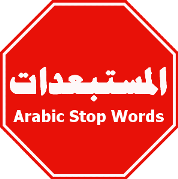

In [14]:


# This function cleans the tokens from all stop words

def removingStopwords(intweet):
    cleanTweet = ''
    temptweet = word_tokenize(intweet)
    stopword = []
    
    for i in temptweet:
        # Stop words can be downloaded from https://github.com/nuhaalbadi/Arabic_hatespeech for list 1 and 
        # for list 2 from  https://github.com/mohataher/arabic-stop-words  
        path_1 = "/content/stop_words.csv" # List 1
        path_2 = "/content/stop-words-list.txt" # List 2
        with codecs.open(path_1, "r", encoding="utf-8", errors="ignore") as myfile:
            stop_words = myfile.readlines()
        stop_words_1 = [word.strip() for word in stop_words]
        with codecs.open(path_2, "r", encoding="utf-8", errors="ignore") as myfile:
            stop_words = myfile.readlines()
        stop_words_2 = [word.strip() for word in stop_words]
        stop_words = stop_words_1 + stop_words_2
        if i not in stop_words:
            cleanTweet = cleanTweet + ' ' + i 
    return cleanTweet

tokenFilteredCleaned = []
for i in tokenFiltered:
  token = removingStopwords(i)
  tokenFilteredCleaned.append(token)

tokenFilteredCleaned

[' @ USER',
 ' مجبوس',
 ' دياي😋',
 ' ابا',
 ' مجبوس',
 ' سبايسي',
 ' ويا',
 ' دقوس',
 ' وروب',
 '',
 ' رويد',
 ' @ USER',
 ' @ USER',
 ' مجبوس',
 ' دياي',
 ' @ USER',
 '',
 ' يبيع',
 ' مجبوس',
 ' دياي',
 ' وكيك',
 ' باضعاف',
 ' سعره',
 ' زعلان',
 '',
 ' راتب',
 ' الدكتور',
 ' ٥',
 ' الاف',
 '',
 '',
 '',
 ' ١٠',
 '',
 ' خدمة',
 ' والدكتوراة',
 '',
 '',
 ' تطلع',
 ' عينه',
 ' @ USER',
 ' سبيس',
 '',
 ' محوليه',
 ' لتعليم',
 '',
 ' عمل',
 ' مجبوس',
 ' الدياي',
 ' احسن',
 ' شاركو',
 '',
 ' مجبوس',
 ' httpstcocvnqlywaiZ',
 ' ماحدن',
 ' تجمل',
 ' علينا',
 '',
 ' سوّا',
 '',
 ' مجبوس',
 ' كنا',
 ' نقطع',
 '',
 ' بصل🏃\u200d♀️',
 ' @ USER',
 '',
 '',
 ' جد',
 ' أعرف',
 ' تأثير',
 ' مجبوس',
 ' اللحم',
 ' اللذيذ',
 '',
 ' بالذات',
 ' صوب',
 ' اللضلوع',
 '',
 ' مكثر',
 '',
 ' المعبوج',
 '',
 ' ناسي',
 ' دواء',
 ' الضغط',
 '',
 ' مو',
 ' مقيل',
 ' صح',
 '',
 ' الغداء',
 '',
 ' وضعي',
 ' أدور',
 ' الحرشة',
 '',
 ' النجرة',
 ' لكل',
 '',
 ' يطوف',
 ' جدامي',
 '',
 '',
 ' ذبانة',
 '',
 ' الحل',
 ' قف

You might notice some spaces. So, I will remove the spaces, then I will check the token's frequencies again, and draw a frequency bar chart for the top 20 tokens.

In [15]:
# This function removes spaces from the tokens
def removingSpace(text):
    cleanTweet = ''
    temptweet = word_tokenize(text)
    for i in temptweet:
        #remove more than one space
        i = re.sub(r"\s+"," ", i)
        cleanTweet = cleanTweet + '' + i 
    return cleanTweet

tokenFilteredCleanedExtra = []
for i in tokenFilteredCleaned:
  token = removingSpace(i)
  tokenFilteredCleanedExtra.append(token)

tokenFilteredCleanedExtra



['@USER',
 'مجبوس',
 'دياي😋',
 'ابا',
 'مجبوس',
 'سبايسي',
 'ويا',
 'دقوس',
 'وروب',
 '',
 'رويد',
 '@USER',
 '@USER',
 'مجبوس',
 'دياي',
 '@USER',
 '',
 'يبيع',
 'مجبوس',
 'دياي',
 'وكيك',
 'باضعاف',
 'سعره',
 'زعلان',
 '',
 'راتب',
 'الدكتور',
 '٥',
 'الاف',
 '',
 '',
 '',
 '١٠',
 '',
 'خدمة',
 'والدكتوراة',
 '',
 '',
 'تطلع',
 'عينه',
 '@USER',
 'سبيس',
 '',
 'محوليه',
 'لتعليم',
 '',
 'عمل',
 'مجبوس',
 'الدياي',
 'احسن',
 'شاركو',
 '',
 'مجبوس',
 'httpstcocvnqlywaiZ',
 'ماحدن',
 'تجمل',
 'علينا',
 '',
 'سوّا',
 '',
 'مجبوس',
 'كنا',
 'نقطع',
 '',
 'بصل🏃\u200d♀️',
 '@USER',
 '',
 '',
 'جد',
 'أعرف',
 'تأثير',
 'مجبوس',
 'اللحم',
 'اللذيذ',
 '',
 'بالذات',
 'صوب',
 'اللضلوع',
 '',
 'مكثر',
 '',
 'المعبوج',
 '',
 'ناسي',
 'دواء',
 'الضغط',
 '',
 'مو',
 'مقيل',
 'صح',
 '',
 'الغداء',
 '',
 'وضعي',
 'أدور',
 'الحرشة',
 '',
 'النجرة',
 'لكل',
 '',
 'يطوف',
 'جدامي',
 '',
 '',
 'ذبانة',
 '',
 'الحل',
 'قفشة',
 'كمون',
 '',
 'قفشة',
 'كزبرة',
 '',
 '',
 '',
 'ينتهي',
 '🤣🤣🤣🤣',
 '@USER',
 ''

In [16]:
#checking the top tokens again after filtering and cleaning 
counter = Counter(tokenFilteredCleanedExtra)
counter.most_common(20)

[('', 1233),
 ('@USER', 577),
 ('مجبوس', 540),
 ('دياي', 156),
 ('لحم', 77),
 ('الدياي', 24),
 ('الله', 24),
 ('دجاج', 22),
 ('مو', 21),
 ('-', 18),
 ('😂', 17),
 ('اكل', 15),
 ('اللحم', 13),
 ('والله', 13),
 ('سمج', 11),
 ('هامور', 11),
 ('ياكل', 10),
 ('سمك', 10),
 ('غدانا', 10),
 ('عيش', 10)]

In [ ]:

# This function creates a bar chart of the most frequent 20 tokens

import plotly.offline as po
from plotly.offline import iplot
import plotly.graph_objs as go

freq_df = pd.DataFrame.from_records(counter.most_common(20),
                                    columns=['token', 'count'])


def topTokensBarchart(df):
  y = freq_df['count']

  data = [go.Bar ( x = freq_df.token, y = y, name = 'Most Common Tokens in the Dataset')]
  layout = go.Layout(title = 'Most Common Tokens in the Dataset', xaxis_title="Tokens",
      yaxis_title="Counts")
  fig = go.Figure(data = data, layout = layout)
  po.plot(fig)

  # the graph will be find in html format in the temp folder

  fig.show()


topTokensBarchart(freq_df)

Results also show some unresolved tokens, which need customized preprocessing and cleaning. I will write a specific post to address these issues related to preprocessing Arabic text from user-generated content. For the purpose of this data exploration exercise, I will continue the analysis using this token list.

# **Step 5: Stop Words Frequencies**

The following bar chart plot the most commonly used stop words.  During this step also I used the same two stop words list I used during the previous step to maintain consistency among the analysis' steps. 

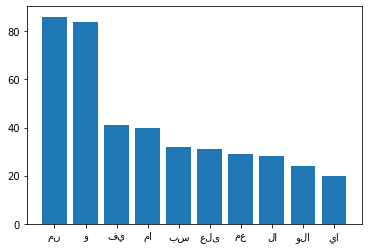

In [ ]:
# This function create a barchart for the most frequently used stop words

def stopwordsBarchart(text):
    # Stop words can be downloaded from https://github.com/nuhaalbadi/Arabic_hatespeech for list 1 and 
    # for list 2 from  https://github.com/mohataher/arabic-stop-words  
    path_1 = "/content/stop_words.csv" # List 1
    path_2 = "/content/stop-words-list.txt" # List 2
    with codecs.open(path_1, "r", encoding="utf-8", errors="ignore") as myfile:
        stop_words = myfile.readlines()
    stop_words_1 = [word.strip() for word in stop_words]
    with codecs.open(path_2, "r", encoding="utf-8", errors="ignore") as myfile:
        stop_words = myfile.readlines()
    stop_words_2 = [word.strip() for word in stop_words]
    stop_words = stop_words_1 + stop_words_2
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop_words:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

    data = [go.Bar ( x = x, y = y, name = 'Most Common Stop Words in the Dataset')]
    layout = go.Layout(title = 'Most Common Stop Words in the Dataset', xaxis_title="Stop Words",
     yaxis_title="Counts")
    fig = go.Figure(data = data, layout = layout)
    po.plot(fig)
    fig.show()


stopwordsBarchart(df['tweet'])


# **Step 6: Number of Tokens per Tweet:**

I will calculate the number of token per tweet and the number of character per token as that can give some indications of the complexity of the issue and the tweet.  The following histogram plots the number of token per tweet.

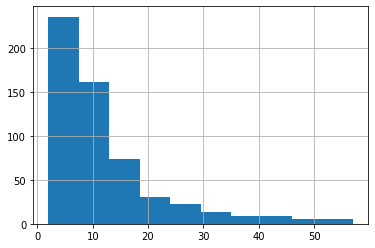

In [ ]:
# This function draw a histogram for the length of tweets based on  the number of tokens per tweet 

def tokenPerTweetHistogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

tokenPerTweetHistogram(df['tweet'])

As can be seen from the histogram above, most tweets contain less than 10 tokens. The next histogram shows the number of characters per token. 

# **Step 7: Number of Characters per Token:**

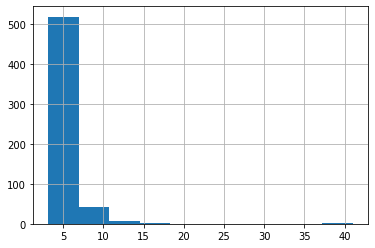

In [ ]:
# This function creates a histogram based on the number of characters per token

def characterPerTokenHistogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()
characterPerTokenHistogram(df['tweet'])

# **Step 8: Word Cloud Graph:**

Word cloud graph provides a visual representation of the text, which could be very helpful to highlight keywords and most important terms in the textual data.  

In [26]:
# this function generate the word cloud

!pip install wordcloud-fa==0.1.4
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from wordcloud_fa import WordCloudFa

wodcloud = WordCloudFa(persian_normalize=False)
# handcrafted terms/characters to further filter the text, selected based on a manual inspection of the data
stop = ['@USER:','@USER','.', ':', '?', '؟','...', '..', '"','!!','']
# words that has "ال" as a main part from them
no_prefix = ['الله', 'اللهم']
tokens_clean = []
for word in tokenFilteredCleanedExtra:
  if (word not in stop):
    if word.startswith('ال'): 
      if (word not in no_prefix):
        word = word[2:] # to remove the prefix "ال"
    tokens_clean.append(word)

#printing the list of tokens
print(tokens_clean)

# generating the word cloud graph
# Need to get downloaded because it will appear in the online temp folder
data = str(tokens_clean)
wc = wodcloud.generate(data)
image = wc.to_image()
image.show()
image.save('wordcloud.png')
image.show()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
['مجبوس', 'دياي😋', 'ابا', 'مجبوس', 'سبايسي', 'ويا', 'دقوس', 'وروب', 'رويد', 'مجبوس', 'دياي', 'يبيع', 'مجبوس', 'دياي', 'وكيك', 'باضعاف', 'سعره', 'زعلان', 'راتب', 'دكتور', '٥', 'اف', '١٠', 'خدمة', 'والدكتوراة', 'تطلع', 'عينه', 'سبيس', 'محوليه', 'لتعليم', 'عمل', 'مجبوس', 'دياي', 'احسن', 'شاركو', 'مجبوس', 'httpstcocvnqlywaiZ', 'ماحدن', 'تجمل', 'علينا', 'سوّا', 'مجبوس', 'كنا', 'نقطع', 'بصل🏃\u200d♀️', 'جد', 'أعرف', 'تأثير', 'مجبوس', 'لحم', 'لذيذ', 'بالذات', 'صوب', 'لضلوع', 'مكثر', 'معبوج', 'ناسي', 'دواء', 'ضغط', 'مو', 'مقيل', 'صح', 'غداء', 'وضعي', 'أدور', 'حرشة', 'نجرة', 'لكل', 'يطوف', 'جدامي', 'ذبانة', 'حل', 'قفشة', 'كمون', 'قفشة', 'كزبرة', 'ينتهي', '🤣🤣🤣🤣', 'بشرق', 'رياض', 'ا-', 'مطعم', 'كبسات', '2-', 'مضغوط', 'تهامة', '3-', 'كاتم', '4-', 'مجبوس', 'فريق', 'هدوا', 'شباب', 'مجبوس', 'فريج', 'محد', 'يسوي', 'كبسه', 'هاي', 'مب', 'كزبرة🤣', 'سلطة', 'جرجير😁', 'مجبوس', 'مطعم', 'سماطلذيذ\U0001f972', 'زفو

In addition to the techniques discussed in this article, there are many other possible ways to analyze the textual data. For example, investigating the use of hashtags in tweets, use of emojis, or if possible frequencies of different part of speech tags (nouns, verbs etc.). 

In this article, I have presented 8 basic steps for EDA that support Arabic text. I hope you find them valuable and informative. Please let me know if you have any comments. You can find the full code on [this Google Colab project](https://colab.research.google.com/drive/1ePOId59aaGfnDa9TqttOe_RLVoNCJdO4?usp=sharing) or [on my GitHub](https://github.com/Fatemah-Husain/Exploratory-Data-Analysis). 